In [29]:
using FFTW, Plots, NAJ, LaTeXStrings

┌ Warning: linestyle 2 is unsupported with Plots.GRBackend(). Choose from: [:auto, :dash, :dashdot, :dashdotdot, :dot, :solid]
└ @ Plots /Users/jiyong/.julia/packages/Plots/HyyIK/src/args.jl:1573


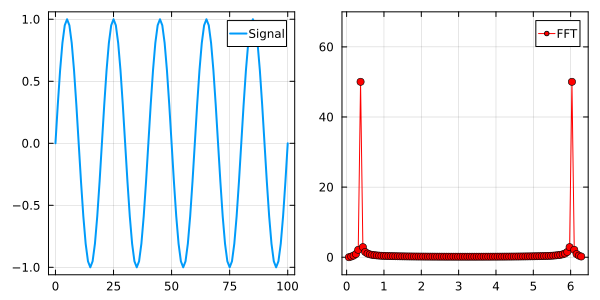

In [121]:
t = 0:100
y = sin.(0.1 * π* t)
p1 = plot(t, y, label = "Signal", lw=2, size=(600, 300), frame = :box)
fy1 = fft(y)
u = (1:length(y))*2*π/length(y)
p2 = plot(u, abs.(fy1), marker = :circle, color=:red, ls=2, ylim=(-5, 70), size=(600, 300), frame = :box, label = "FFT")
plot(p1, p2)


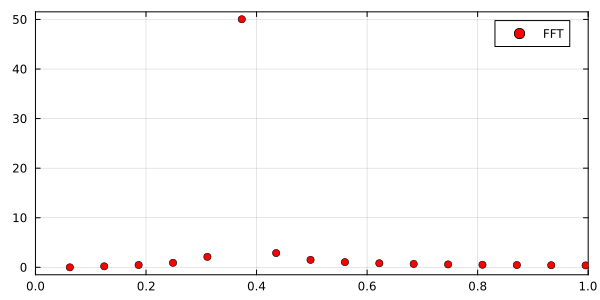

In [113]:
p2 = scatter(u/length(u), abs.(fy1), color=:red, xlim=(0, 1), size=(600, 300), frame = :box, label = "FFT")

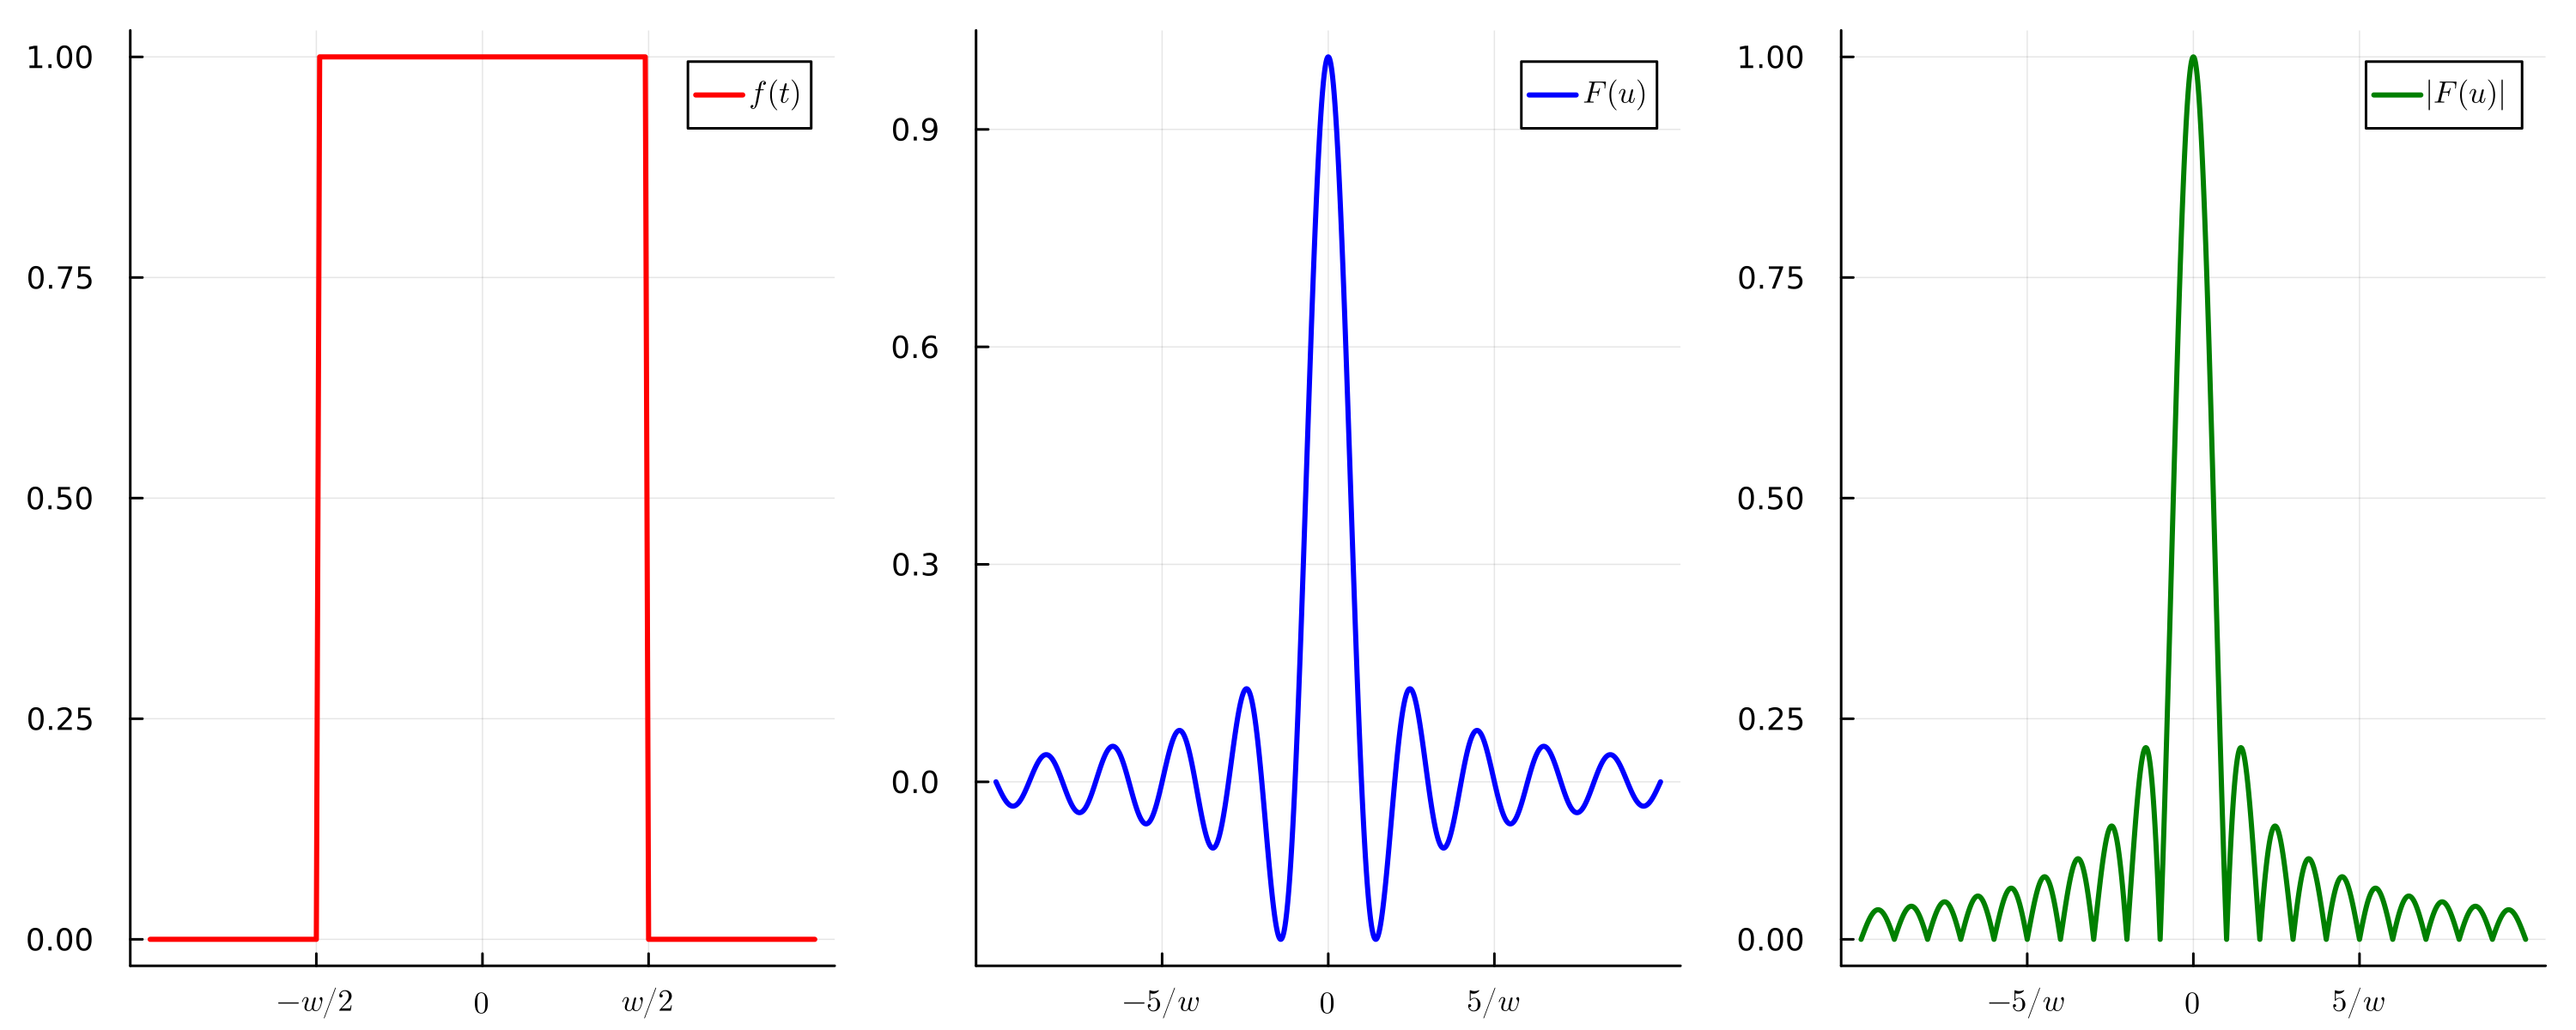

In [157]:
function four_rect(u)
    if abs(u)<1.0e-10
        return one(u)
    else
        return sin(π * u )/(π * u)
    end
end
t = -1:0.01:1
f = zeros(length(t))
f[abs.(t).<0.5] .= 1.0
p1=plot(t, f, xticks =([-0.5, 0, 0.5], [L"-w/2", L"0", L"w/2"]), lw=2, lc=:red, label = L"f(t)")
t2 = -10:0.01:10
p2 = plot(t2, four_rect.(t2), xticks =([-5, 0, 5], [L"-5/w", L"0", L"5/w"]), lc = :blue, lw=2, label = L"F(u)")
p3 = plot(t2, abs.(four_rect.(t2)), xticks =([-5, 0, 5], [L"-5/w", L"0", L"5/w"]), lc = :green, lw=2, label = L"|F(u)|")


plot(p1, p2, p3, layout=(1, 3), size = (1000, 400), dpi=300)

#savefig("fourier_of_rect.png")

In [133]:
fft(y2)

30-element Vector{ComplexF64}:
   148.5483032643493 + 0.0im
   9.625458022101988 - 17.296105959440226im
 -14.275911151896429 - 7.929387899178235im
   3.089308032501984 + 9.278021953947547im
  10.507252113936417 + 0.7405079346007919im
  18.967621292735483 - 3.2691066224656544im
  16.362739416932698 - 14.60299974536916im
    11.4996183163362 + 10.502811831214789im
   13.31106112162681 - 3.917371781846284im
  -4.927299753697216 + 7.361962315011im
                     ⋮
  -4.927299753697216 - 7.3619623150110005im
   13.31106112162681 + 3.9173717818462834im
    11.4996183163362 - 10.502811831214785im
  16.362739416932698 + 14.60299974536916im
  18.967621292735483 + 3.2691066224656553im
  10.507252113936417 - 0.7405079346007948im
  3.0893080325019837 - 9.278021953947547im
  -14.27591115189643 + 7.92938789917824im
    9.62545802210199 + 17.296105959440226im

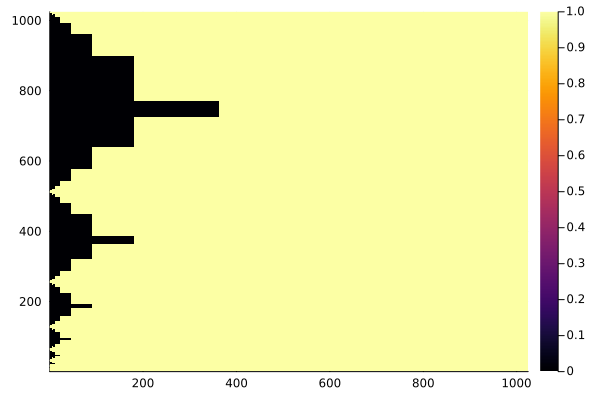

In [162]:
A= zeros(Float64, (1024, 1024))
for x ∈ 1:1024, y ∈ 1:1024
    xp, yp = round(x/64), round(y/64)
    if (x-xp)^2 + (y-yp^2) < 9.0
        A[x, y] = 1.0
    end
end

heatmap(A)


In [164]:
x, y =15, 40
xp, yp = 2^round(log2(x)), 2^round(log2(y))

(16.0, 32.0)

In [ ]:
ifft(fft([1,2,3,4.0, 5.0+1.0im, 2, -1]))

In [ ]:
fft([1,1,1,1,1])

In [ ]:
ifft(fft([0,0,1,0,0]))

In [ ]:
ifft(fft([1,0,0,0,0]))